In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:


df=pd.read_csv("placement- datase2.csv")

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [12]:
df.isnull().sum()

,0
cgpa,8
iq,4
placement,0


In [13]:
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())
df['iq'] = df['iq'].fillna(df['iq'].mean())


In [14]:
df.isnull().sum()

,0
cgpa,0
iq,0
placement,0


In [16]:
x=df.iloc[:,:-1]
y=df["placement"]

In [17]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(64.14260818459725, 56.27284634089897)

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [33]:
y_pred_binary = (lr.predict(x_test) > 0.5).astype(int)
cf=confusion_matrix(y_test, y_pred_binary)

In [34]:
cf


array([[9, 1],
       [2, 8]])

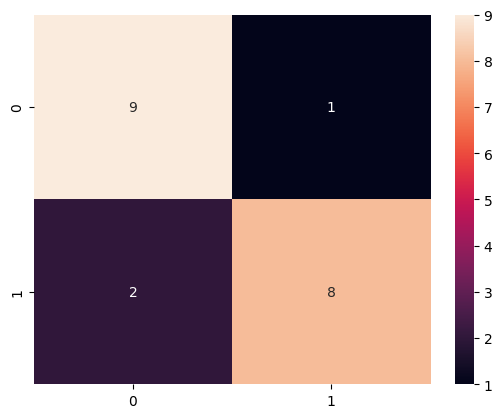

In [36]:
sns.heatmap(cf,annot=True)
plt.show()

In [37]:
precision_score(y_test, y_pred_binary)

0.8888888888888888

In [38]:
recall_score(y_test, y_pred_binary)

0.8

In [39]:
f1_score(y_test, y_pred_binary)

0.8421052631578947